<a href="https://colab.research.google.com/github/jspinaj/Computer-Vision/blob/main/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Jupyter Notebook


In [60]:
# Setup 

import numpy as np
import random
import pandas as pd

import cv2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [61]:


#df.info()

#print(df['img_filename'])


In [62]:
def segmentation(img_filename):
    og_img=cv2.imread(img_filename)     #original image
    img_category=random.randint(1,2)

    # extract segment
    prop1=random.randrange(0,300, 1)
    prop2=random.randint(1,100)
    
    prop3=random.randrange(-15,100, 1)
    properties=  [img_filename, img_category, prop1, prop2, prop3] 
    
    return properties
             
    

In [63]:
# image ingest

image_list = open("data/traffic_filename_list.txt", "r")  
data=[]
properties=[]
random.seed(10)
for img_filename in image_list:
    properties=segmentation(img_filename)
    
    data.append(properties)


# images properties dataframe
col_names=['img_filename','category','prop1', 'prop2', 'prop3']
df=pd.DataFrame(data, columns = col_names)

csv_filename="data/properties.csv"
df.to_csv(csv_filename)


df2=pd.read_csv(csv_filename )

#print(df2)

In [68]:
# Properties Analysis
features=df[['prop1','prop2','prop3']]
corr_coef = features.corr()

mu=features.mean()
sigma=features.var()

#print(corr_coef)

# Normalization 
features=(features-mu)/sigma

# Perform PCA analysis
pca = PCA(n_components=features.shape[1])
pca.fit(features)
print(pca.components_)
print("explained_varianc_ratio " + str(pca.explained_variance_ratio_))




[[-0.02040101  0.99855823  0.04965141]
 [ 0.03441826  0.05033375 -0.99813922]
 [-0.99919927 -0.01865414 -0.03539549]]
explained_varianc_ratio [0.54707979 0.39620489 0.05671533]


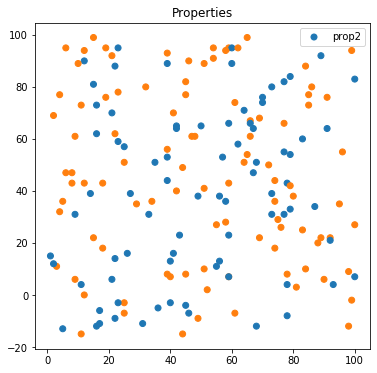

In [65]:



dfC1, dfC2 = [x for _, x in df.groupby('category')]


fig, ax = plt.subplots(figsize=(6, 6))

colors = {1:'tab:blue', 2:'tab:orange'}
c=df['category'].map(colors)

ax.scatter(df['prop2'], df['prop3'],c=df['category'].map(colors))


plt.title('Properties')
ax.legend(['prop2','prop3'])
plt.show()
